# Постановка задачи




> С помощью эконометрического инструментария оценить влияние учетной ставки Центробанка на инфляцию на примере произвольно выбранной экономики. Данные брать из открытых источников. По итогам подготовить и презентовать отчет о проделанной работе.

# План работы

1.   Определиться с регионом + сбор данных
2.   Изучение теории о связи ставки и инфляции, выдвижение гипотез
3.   Предварительный анализ данных
4.   Построение эконометрических моделей
5.   Оценка моделей
6.   Отчет



# 1. Выбор региона-экономики

Центральный банк Турции (CBRT) часто меняет учетную ставку в ответ на инфляционные процессы, что позволяет изучить, насколько эффективны такие меры в условиях высокой инфляции и как быстро изменения ставки отражаются на экономике. При этом Турция публикует регулярные и подробные данные по инфляции, учетной ставке и другим макроэкономическим показателям, что делает анализ более удобным, точным и обоснованным. Именно поэтому наш выбор пал на Турцию.

Данные были взяты с источника: [ссылка](https://ru.investing.com/)

# 2. Изучение теории о связи ставки и инфляции, выдвижение гипотез


Повышение учетной ставки делает кредиты дороже, сокращает денежную массу и снижает спрос, что помогает сдерживать инфляцию. Снижение ставки, наоборот, стимулирует кредитование и увеличивает спрос, что приводит к увеличению денежной массы в экономике, и как следствие приводит к росту инфляции.
Так происходит не всегда, так как на инфляцию влиет еще очень много факторов. Наше исследование будет анализировать успешность снижения/повышения учетной ставки в Турции в зависимости от того, получилось ли у них повысить/понизить инфляцию, поэтому определим 2 вывода к которым мы можем придти в конце работы:

*   Основной вывод: государство Турция успешно контролирует инфляцию, благодаря изменению ключевой ставки. Также определить с какой задержкой изменение ключевой ставки повлияет на инфляцию.
*   Альтернативный вывод: государству Турция не удается контролировать инфляцию с помощью изменения ключевой ставки из-за влияния сторонних факторов.

# 3. Предварительный анализ данных

In [ ]:
# Библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
df = pd.read_csv('data_Turkey.csv')
df.head()

,data,index,rate
0,12.2024,"44,38%","47,50%"
1,11.2024,"47,09%","50,00%"
2,10.2024,"48,58%","50,00%"
3,9.2024,"49,38%","50,00%"
4,8.2024,"51,97%","50,00%"


In [ ]:
df.shape

(180, 3)

In [ ]:
df.isnull().sum()

,0
data,0
index,0
rate,0


In [ ]:
df.dtypes

,0
data,float64
index,object
rate,object


In [ ]:
# Функция для преобразования строки в float
def convert_to_float(value):
    # Убираем символ '%', заменяем запятую на точку и преобразуем в float
    return float(value.replace('%', '').replace(',', '.'))
# Применяем функцию к столбцам 'index' и 'rate'
df['index'] = df['index'].apply(convert_to_float)
df['rate'] = df['rate'].apply(convert_to_float)
# Преобразование float в строку
df['data'] = df['data'].astype(str)
# Исправление некорректных значений
df['data'] = df['data'].apply(lambda x: x + '0' if len(x[x.find('.')+1:]) == 3 else x)
# Преобразование столбца 'data' в формат даты
df['data'] = pd.to_datetime(df['data'], format='%m.%Y')
df.set_index('data', inplace=True)

In [ ]:
df.dtypes

,0
index,float64
rate,float64


In [ ]:
df.describe()

,index,rate
count,180.000000,180.000000
mean,21.047056,13.501389
std,21.686661,11.538904
min,3.990000,4.500000
25%,8.097500,7.000000
50%,10.505000,8.250000
75%,19.680000,16.125000
max,85.510000,50.000000


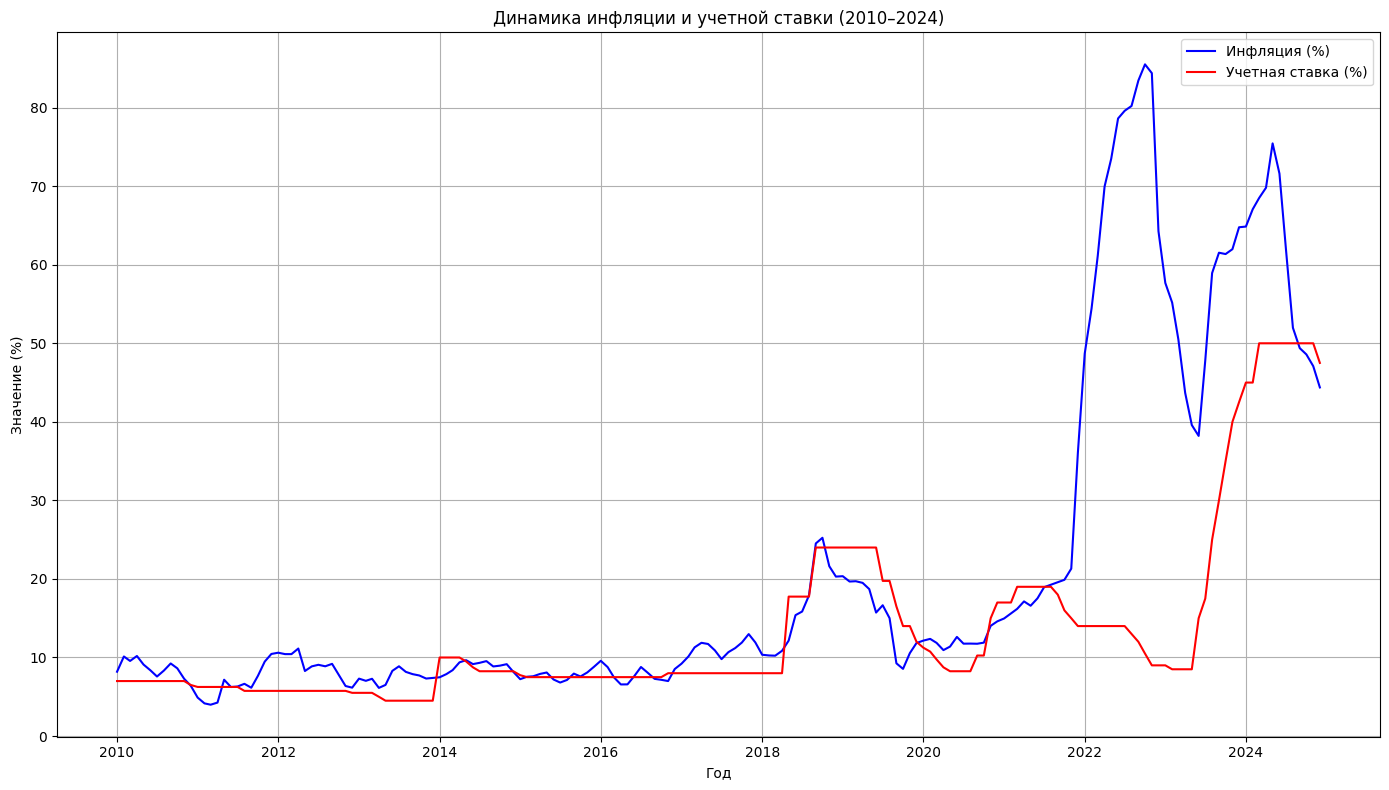

In [ ]:
# Создаем фигуру и оси
plt.figure(figsize=(14, 8))

# График для 'index' (инфляция)
plt.plot(df.index, df['index'], label='Инфляция (%)', color='blue')

# График для 'rate' (учетная ставка)
plt.plot(df.index, df['rate'], label='Учетная ставка (%)', color='red')

# Настройки графика
plt.title('Динамика инфляции и учетной ставки (2010–2024)')
plt.xlabel('Год')
plt.ylabel('Значение (%)')
plt.legend()
plt.grid(True)

# Показать график
plt.tight_layout()
plt.show()

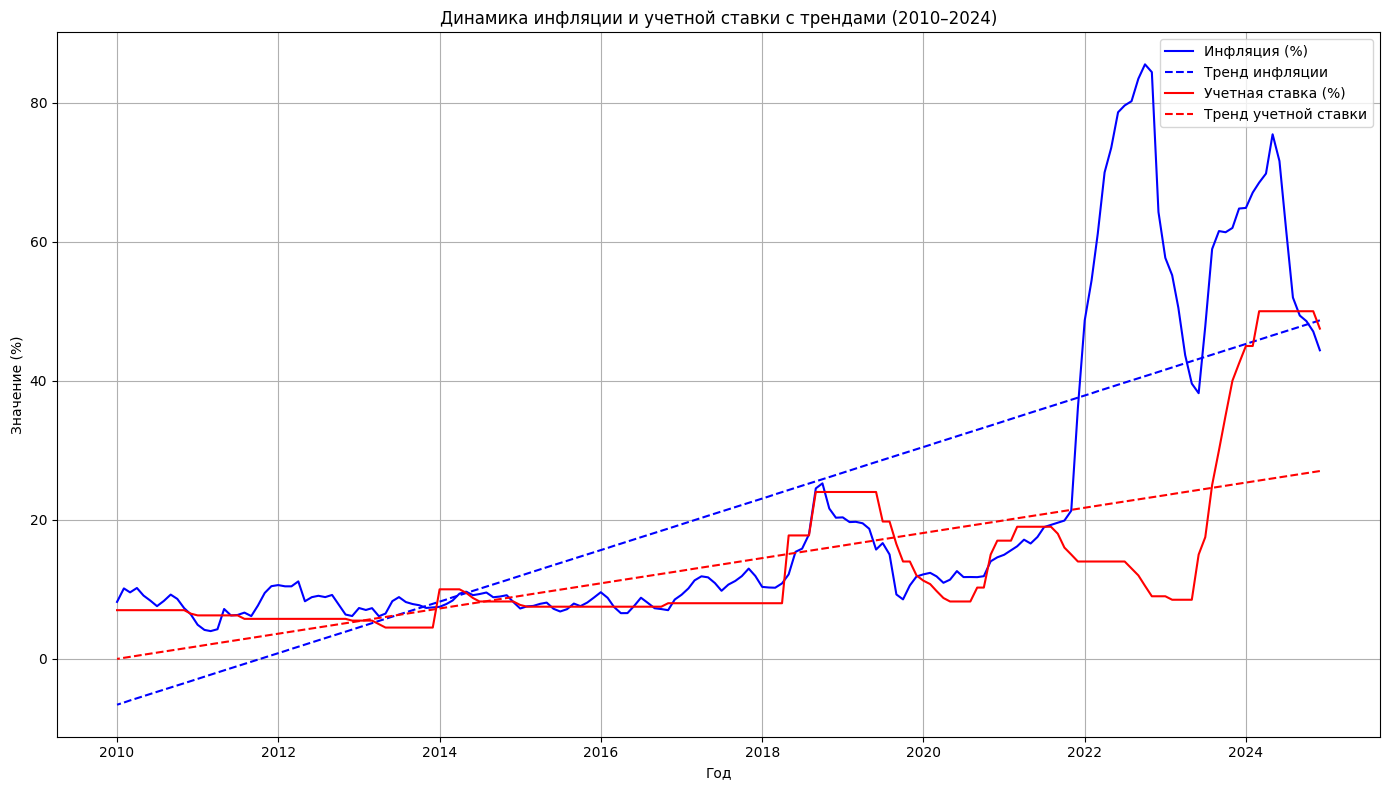

In [ ]:
# Линии тренда
x = np.arange(len(df))  # Числовой массив для оси X
z_index = np.polyfit(x, df['index'], 1)  # Линейный тренд для инфляции
z_rate = np.polyfit(x, df['rate'], 1)  # Линейный тренд для учетной ставки

# Создаем фигуру и оси
plt.figure(figsize=(14, 8))

# График для 'index' (инфляция)
plt.plot(df.index, df['index'], label='Инфляция (%)', color='blue')
plt.plot(df.index, np.poly1d(z_index)(x), linestyle='--', color='blue', label='Тренд инфляции')

# График для 'rate' (учетная ставка)
plt.plot(df.index, df['rate'], label='Учетная ставка (%)', color='red')
plt.plot(df.index, np.poly1d(z_rate)(x), linestyle='--', color='red', label='Тренд учетной ставки')

# Настройки графика
plt.title('Динамика инфляции и учетной ставки с трендами (2010–2024)')
plt.xlabel('Год')
plt.ylabel('Значение (%)')
plt.legend()
plt.grid(True)

# Показать график
plt.tight_layout()
plt.show()

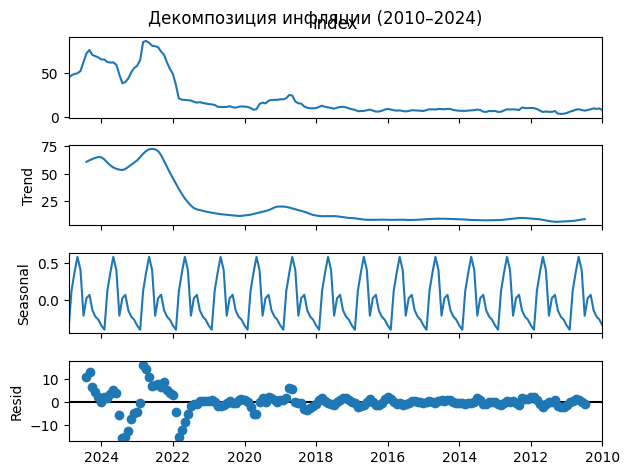

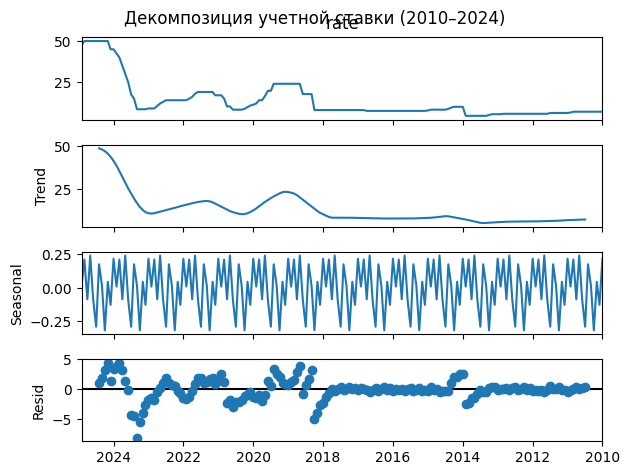

In [ ]:
# Декомпозиция для 'index' (инфляция)
decomposition_index = seasonal_decompose(df['index'], model='additive', period=12)
decomposition_index.plot()
plt.suptitle('Декомпозиция инфляции (2010–2024)')
plt.show()

# Декомпозиция для 'rate' (учетная ставка)
decomposition_rate = seasonal_decompose(df['rate'], model='additive', period=12)
decomposition_rate.plot()
plt.suptitle('Декомпозиция учетной ставки (2010–2024)')
plt.show()

In [ ]:
correlation = df['index'].corr(df['rate'])
print(f"Корреляция между инфляцией и учетной ставкой: {correlation:.2f}")

Корреляция между инфляцией и учетной ставкой: 0.62


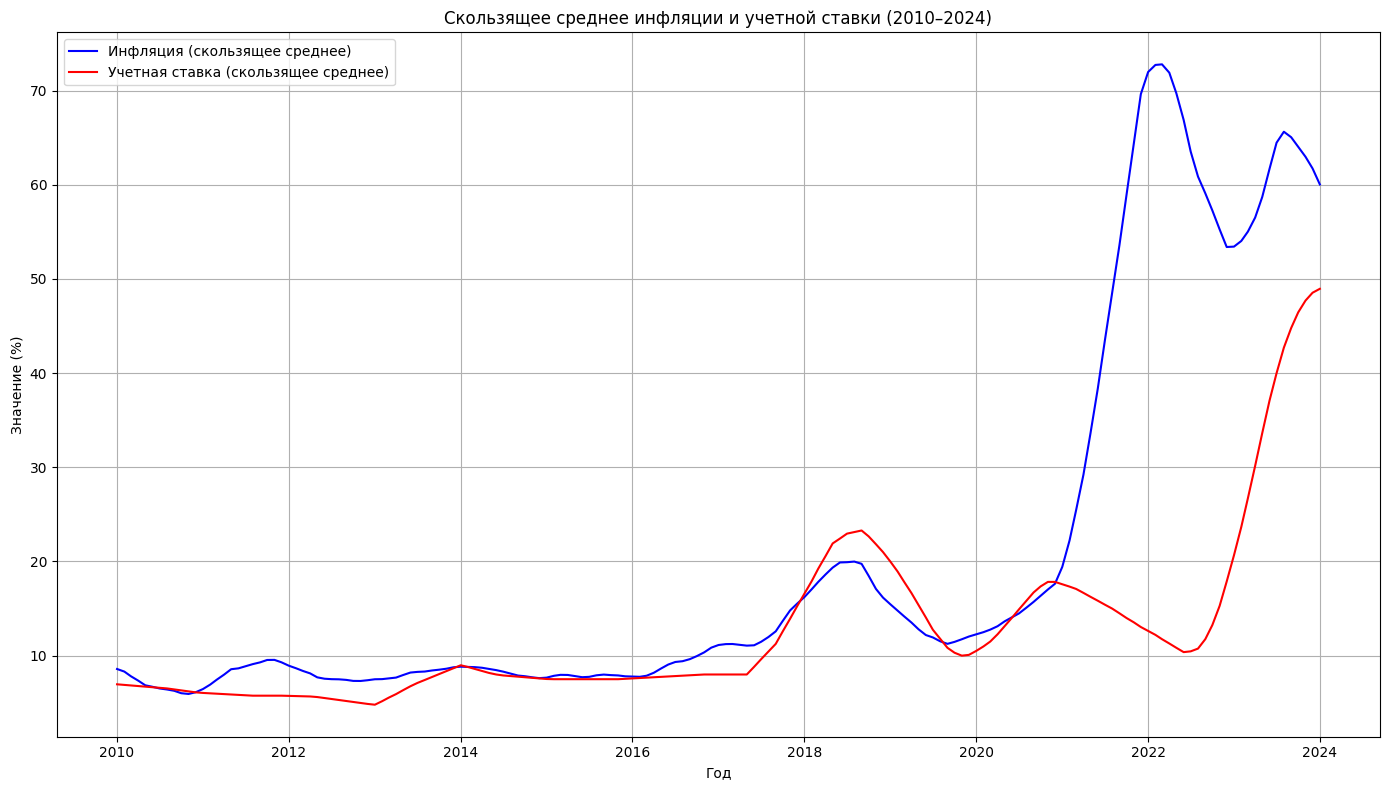

In [ ]:
df['index_ma'] = df['index'].rolling(window=12).mean()  # Скользящее среднее за 12 месяцев
df['rate_ma'] = df['rate'].rolling(window=12).mean()

plt.figure(figsize=(14, 8))
plt.plot(df.index, df['index_ma'], label='Инфляция (скользящее среднее)', color='blue')
plt.plot(df.index, df['rate_ma'], label='Учетная ставка (скользящее среднее)', color='red')
plt.title('Скользящее среднее инфляции и учетной ставки (2010–2024)')
plt.xlabel('Год')
plt.ylabel('Значение (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Добавление переменных

Эндогенность в регрессионном анализе — это ситуация, когда одна или несколько независимых переменных (факторов) в модели связаны с ошибкой (остатками) модели. Простыми словами, это означает, что факторы, которые мы используем для объяснения зависимой переменной, сами зависят от чего-то, что не учтено в модели, и это может исказить результаты.

Как можно решить проблему эндогенности регрессора из-за пропуска существенной переменной?

Еси данные известны, для решения проблемы нужно просто добавить пропущенную переменную в модель. В реальных исследованиях таких пропущенных переменных обычно не одна, а несколько (так как мир устроен сложно, и на зависимую переменную обычно влияют сразу много факторов). Что ж, тогда нужно добавить их все.

Переменные, которые вы добавляете в модель, чтобы устранить смещение оценки нужного вам коэффициента, называют контрольными.

Сформулируем два определения:

*   Переменная интереса (variable of interest) — фактор, влияние которого на зависимую переменную нас интересует.
*   Контрольные переменные (control variables) — переменные, которые мы включаем в модель для того, чтобы избежать смещения коэффициента при интересующей нас переменной.

Так как включение дополнительных переменных в модель позволяет избежать несостоятельности коэффициентов, кажется, что разумно включать их в модель как можно больше.

Последствия включения в модель несущественной переменной:

1. Коэффициенты при прочих переменных остаются несмещенными и состоятельными. Действительно, если новый регрессор не влияет на зависимую переменную, то можно всё равно считать, что он входит в модель, просто истинный коэффициент при нём равен нулю.

2. Из-за необходимости оценивать большее количество коэффициентов, а также из-за вероятной мультиколлинеарности увеличивается дисперсия оценок коэффициентов, то есть снижается точность модели.

Таким образом, включить в модель лишнюю переменную не так страшно, как пропустить нужную. Ведь в первом случае нет несостоятельности оценок, а во втором она возникает. Однако слишком много несущественных переменных включать в уравнение нецелесообразно, так как это негативно сказывается на точности ваших результатов.

Поэтому хочется иметь набор правил, чтобы принимать решение, включать ли ту или иную переменную в уравнение. Ниже приведены некоторые соображения по этому поводу.

Критерии для включения переменной в модель:

1. Роль переменной в уравнении опирается на прочные теоретические основания. Ну или хотя бы на здравый смысл.

2. Переменная статистически значима

3. Оценки других коэффициентов сильно меняются при включении новой переменной в модель. Это значит, что до этого они страдали от смещения из-за пропуска существенной переменной. Теперь вы эту существенную переменную добавили, и смещение пропало.

4. Скорректированный R-квадрат существенно увеличивается в результате включения переменной в модель

[Источник](https://books.econ.msu.ru/Introduction-to-Econometrics/chap07/7.1/)

Факторы, которые стоит добавить в модель:

1. Мировая цена на нефть
2. Курс лиры к доллару
3. ВВП
4. Денежная масса
5. Импорт/экспорт

In [ ]:
# Библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
df = pd.read_csv('Turkey_data.csv')

# Функция для преобразования строки в float
def convert_to_float(value):
    # Убираем символ '%', заменяем запятую на точку и преобразуем в float
    return float(value.replace('%', '').replace(',', '.'))
# Применяем функцию к столбцам 'index' и 'rate'
df['index'] = df['index'].apply(convert_to_float)
df['rate'] = df['rate'].apply(convert_to_float)
# Преобразование float в строку
df['data'] = df['data'].astype(str)
# Исправление некорректных значений
df['data'] = df['data'].apply(lambda x: x + '0' if len(x[x.find('.')+1:]) == 3 else x)
# Преобразование столбца 'data' в формат даты
df['data'] = pd.to_datetime(df['data'], format='%m.%Y')
df.set_index('data', inplace=True)

In [ ]:
'''курс доллар лира'''
usd_try_df = pd.read_csv('usd_tur.csv')
usd_try_df['observation_date'] = pd.to_datetime(usd_try_df['observation_date'])  # Преобразуем дату в datetime
usd_try_df.rename(columns={'CCUSMA02TRM618N': 'usd_try'}, inplace=True)  # Переименуем столбец для удобства
usd_try_df.set_index('observation_date', inplace=True)  # Устанавливаем дату как индекс
df = df.join(usd_try_df, how='left')

In [ ]:
'''цена на нефть доллары за баррель (brent)'''
oil_df = pd.read_csv('oil_price.csv')
oil_df['observation_date'] = pd.to_datetime(oil_df['observation_date'])  # Преобразуем дату в datetime
oil_df.rename(columns={'MCOILWTICO': 'oil_price'}, inplace=True)  # Переименуем столбец для удобства
oil_df.set_index('observation_date', inplace=True)  # Устанавливаем дату как индекс
df = df.join(oil_df, how='left')

In [ ]:
'''ввп (миллионы в нац валюте)'''
gdp_df = pd.read_csv('gdp.csv')
gdp_df['observation_date'] = pd.to_datetime(gdp_df['observation_date'])  # Преобразуем дату в datetime
gdp_df.rename(columns={'NGDPRSAXDCTRQ': 'gdp'}, inplace=True)  # Переименуем столбец для удобства
gdp_df.set_index('observation_date', inplace=True)  # Устанавливаем дату как индекс
gdp_df = gdp_df.resample('MS').ffill()
df = df.join(gdp_df, how='left')

In [ ]:
'''m3 (денежная масса)'''
m3_df = pd.read_csv('m3.csv')
m3_df['observation_date'] = pd.to_datetime(m3_df['observation_date'])  # Преобразуем дату в datetime
m3_df.rename(columns={'MABMM301TRM189N': 'm3'}, inplace=True)  # Переименуем столбец для удобства
m3_df.set_index('observation_date', inplace=True)  # Устанавливаем дату как индекс
df = df.join(m3_df, how='left')

In [ ]:
'''imports (сколько было импорта в долларах сша)'''
imports_df = pd.read_csv('imports.csv')
imports_df['observation_date'] = pd.to_datetime(imports_df['observation_date'])  # Преобразуем дату в datetime
imports_df.rename(columns={'XTIMVA01TRA667S': 'imports1'}, inplace=True)  # Переименуем столбец для удобства
imports_df.set_index('observation_date', inplace=True)  # Устанавливаем дату как индекс
imports_df = imports_df.resample('MS').ffill()
df = df.join(imports_df, how='left')

In [ ]:
'''exports usd'''
exports_df = pd.read_csv('exports.csv')
exports_df['observation_date'] = pd.to_datetime(exports_df['observation_date'])  # Преобразуем дату в datetime
exports_df.rename(columns={'XTEXVA01TRM667S': 'exports'}, inplace=True)  # Переименуем столбец для удобства
exports_df.set_index('observation_date', inplace=True)  # Устанавливаем дату как индекс
df = df.join(exports_df, how='left')

In [ ]:
df

,index,rate,usd_try,oil_price,gdp,m3,imports1,exports
data,,,,,,,,
2024-12-01,44.38,47.5,34.967164,70.12,NaN,NaN,NaN,2.229420e+10
2024-11-01,47.09,50.0,34.414752,69.95,NaN,NaN,NaN,2.169468e+10
2024-10-01,48.58,50.0,34.205096,71.99,NaN,NaN,NaN,2.164523e+10
2024-09-01,49.38,50.0,34.009281,70.24,NaN,NaN,NaN,2.156658e+10
2024-08-01,51.97,50.0,33.645718,76.68,NaN,NaN,NaN,2.229825e+10
...,...,...,...,...,...,...,...,...
2010-05-01,9.10,7.0,1.541019,73.74,288321.605760,5.418631e+11,1.856735e+11,9.832379e+09
2010-04-01,10.19,7.0,1.485386,84.29,288321.605760,5.327064e+11,1.856735e+11,9.175556e+09
2010-03-01,9.56,7.0,1.527426,81.20,277764.581387,5.341976e+11,1.856735e+11,9.250937e+09


In [ ]:
df = df.dropna()

Отношения между переменными

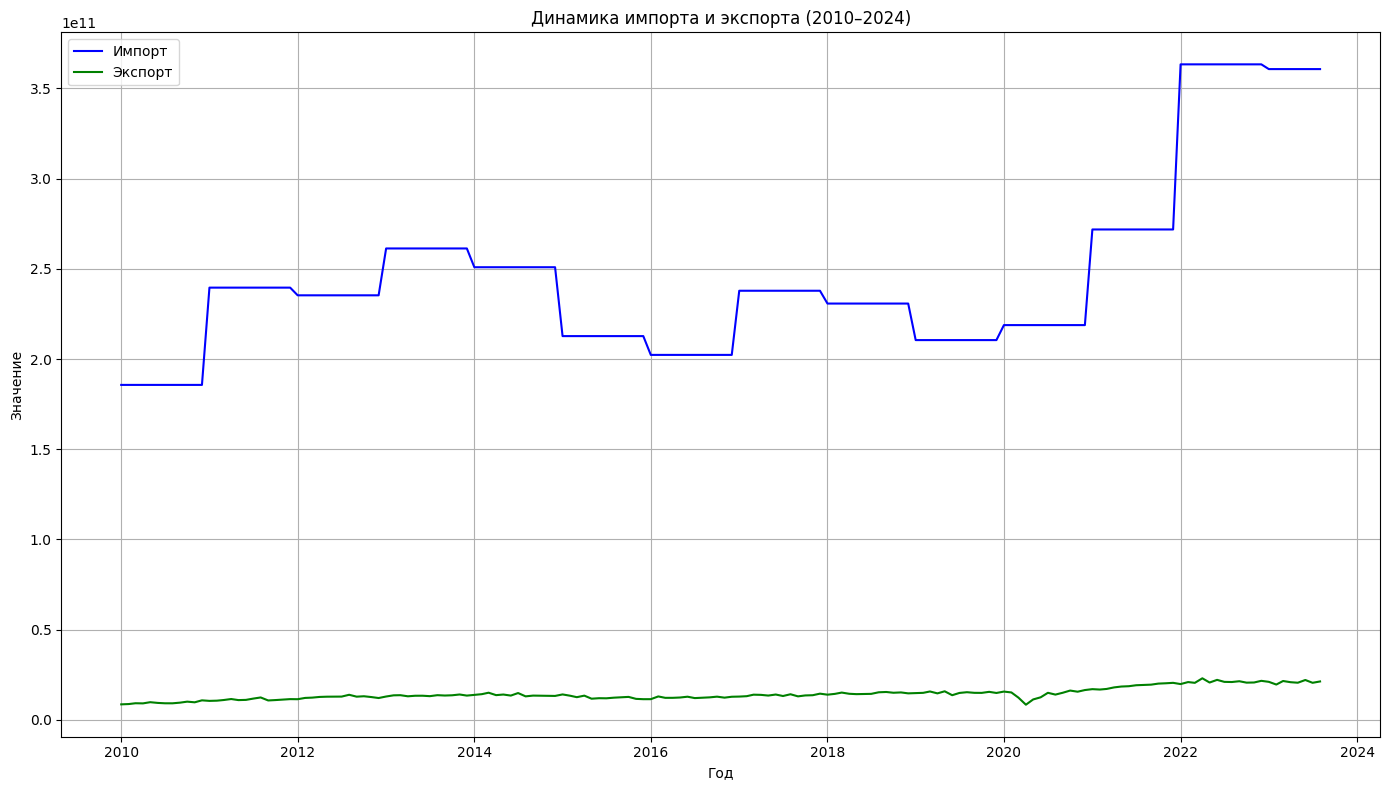

In [ ]:
'''экспорт и импорт'''
plt.figure(figsize=(14, 8))
plt.plot(df.index, df['imports1'], label='Импорт', color='blue')
plt.plot(df.index, df['exports'], label='Экспорт', color='green')
plt.title('Динамика импорта и экспорта (2010–2024)')
plt.xlabel('Год')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

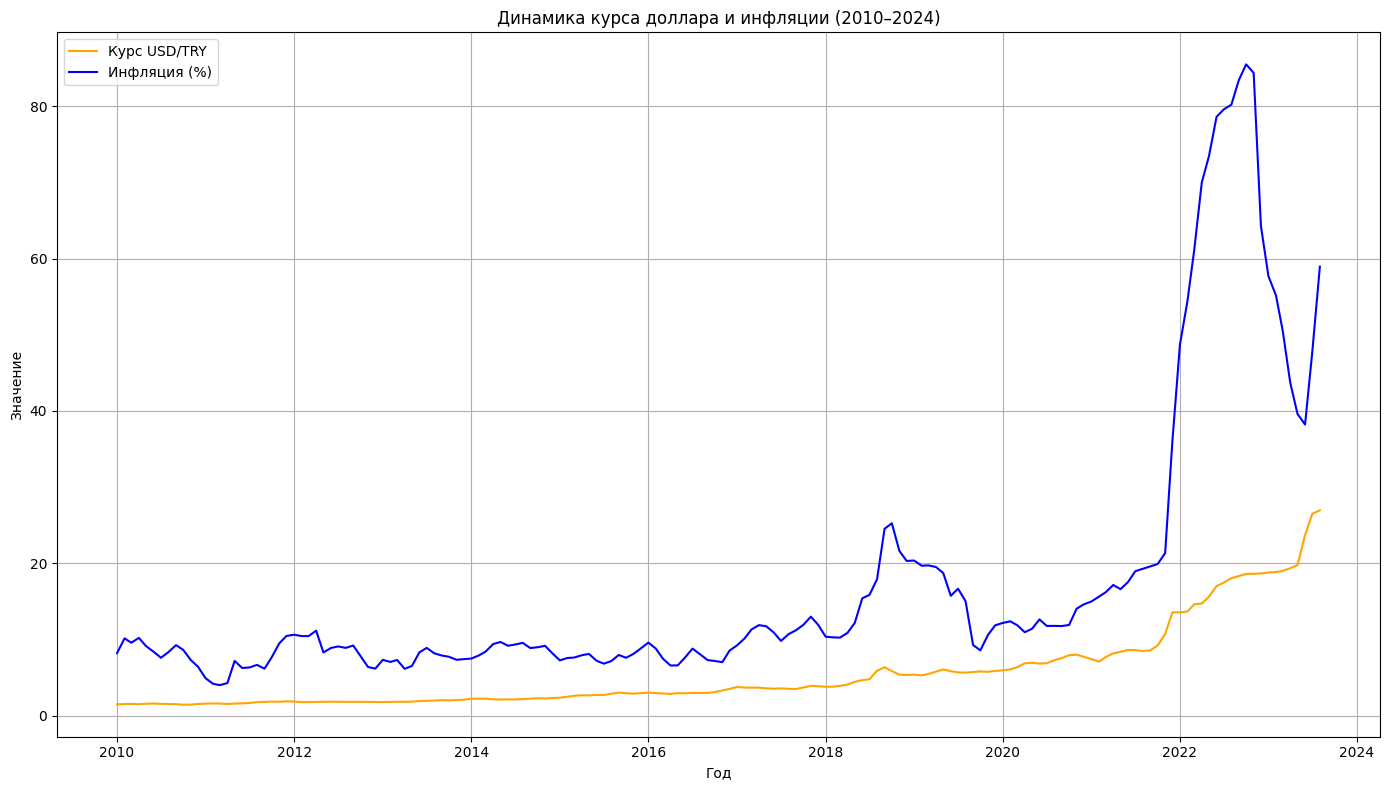

In [ ]:
'''курс доллара и инфляция'''
plt.figure(figsize=(14, 8))
plt.plot(df.index, df['usd_try'], label='Курс USD/TRY', color='orange')
plt.plot(df.index, df['index'], label='Инфляция (%)', color='blue')
plt.title('Динамика курса доллара и инфляции (2010–2024)')
plt.xlabel('Год')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

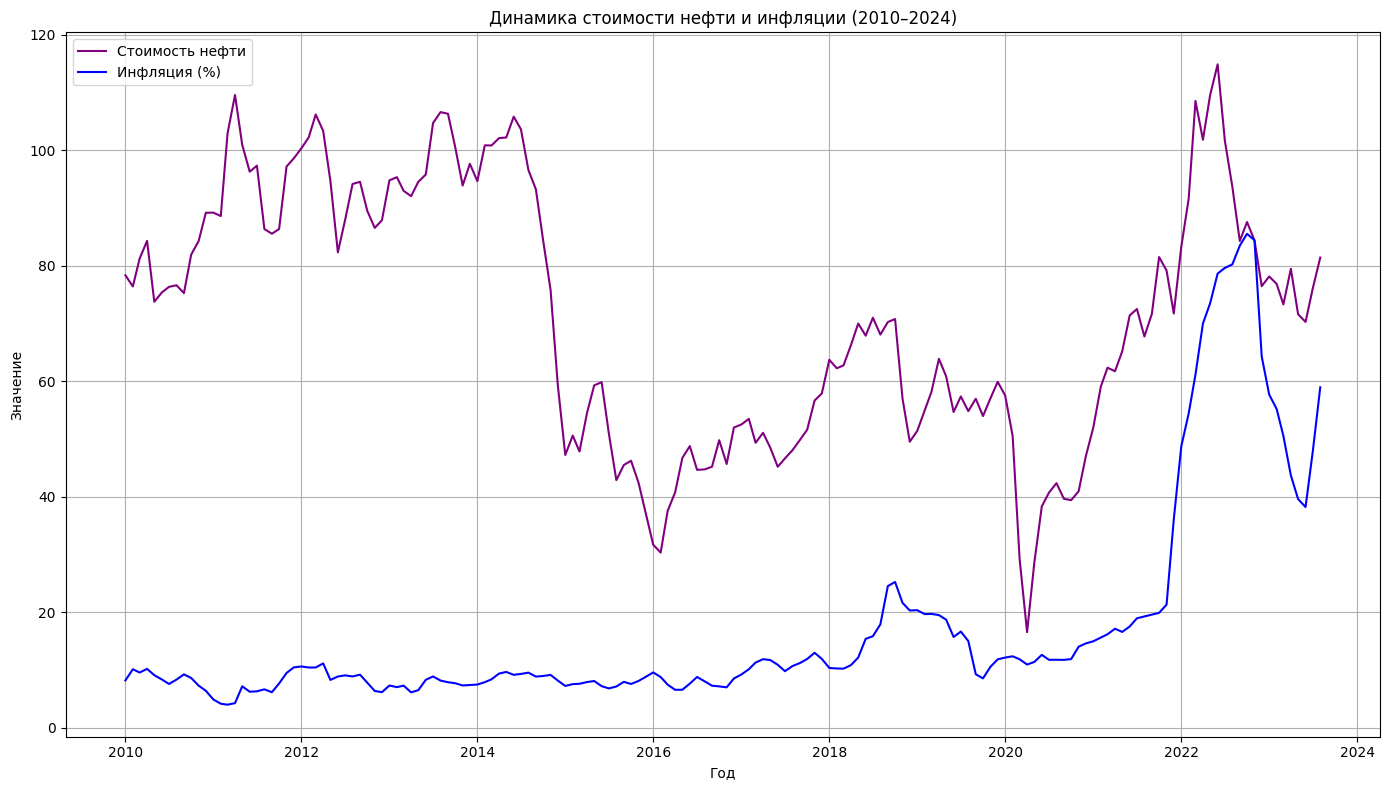

In [ ]:
'''стоимость нефти и инфляция'''
plt.figure(figsize=(14, 8))
plt.plot(df.index, df['oil_price'], label='Стоимость нефти', color='purple')
plt.plot(df.index, df['index'], label='Инфляция (%)', color='blue')
plt.title('Динамика стоимости нефти и инфляции (2010–2024)')
plt.xlabel('Год')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
'''стандартизация ввп и м3'''

from sklearn.preprocessing import StandardScaler
import pandas as pd

# Выберем только нужные столбцы для стандартизации
columns_to_scale = ['gdp', 'm3', 'index']
df_to_scale = df[columns_to_scale]

# Инициализируем StandardScaler
scaler = StandardScaler()

# Применяем стандартизацию
df_scaled = pd.DataFrame(scaler.fit_transform(df_to_scale), columns=columns_to_scale, index=df.index)

# Добавляем остальные столбцы обратно
df_scaled = pd.concat([df_scaled, df.drop(columns_to_scale, axis=1)], axis=1)

# Теперь df_scaled содержит стандартизированные данные
print(df_scaled.head())

                 gdp        m3     index  rate    usd_try  oil_price  \
data                                                                   
2023-08-01  1.944782  4.034645  2.273705  25.0  26.943078      81.39   
2023-07-01  1.944782  3.849603  1.668724  17.5  26.499400      76.07   
2023-06-01  1.928083  3.461834  1.144879  15.0  23.696505      70.25   
2023-05-01  1.928083  2.877264  1.220025   8.5  19.747743      71.58   
2023-04-01  1.928083  2.918849  1.442741   8.5  19.337250      79.45   

                imports1       exports  
data                                    
2023-08-01  3.606926e+11  2.132312e+10  
2023-07-01  3.606926e+11  2.058553e+10  
2023-06-01  3.606926e+11  2.213421e+10  
2023-05-01  3.606926e+11  2.062440e+10  
2023-04-01  3.606926e+11  2.091550e+10  


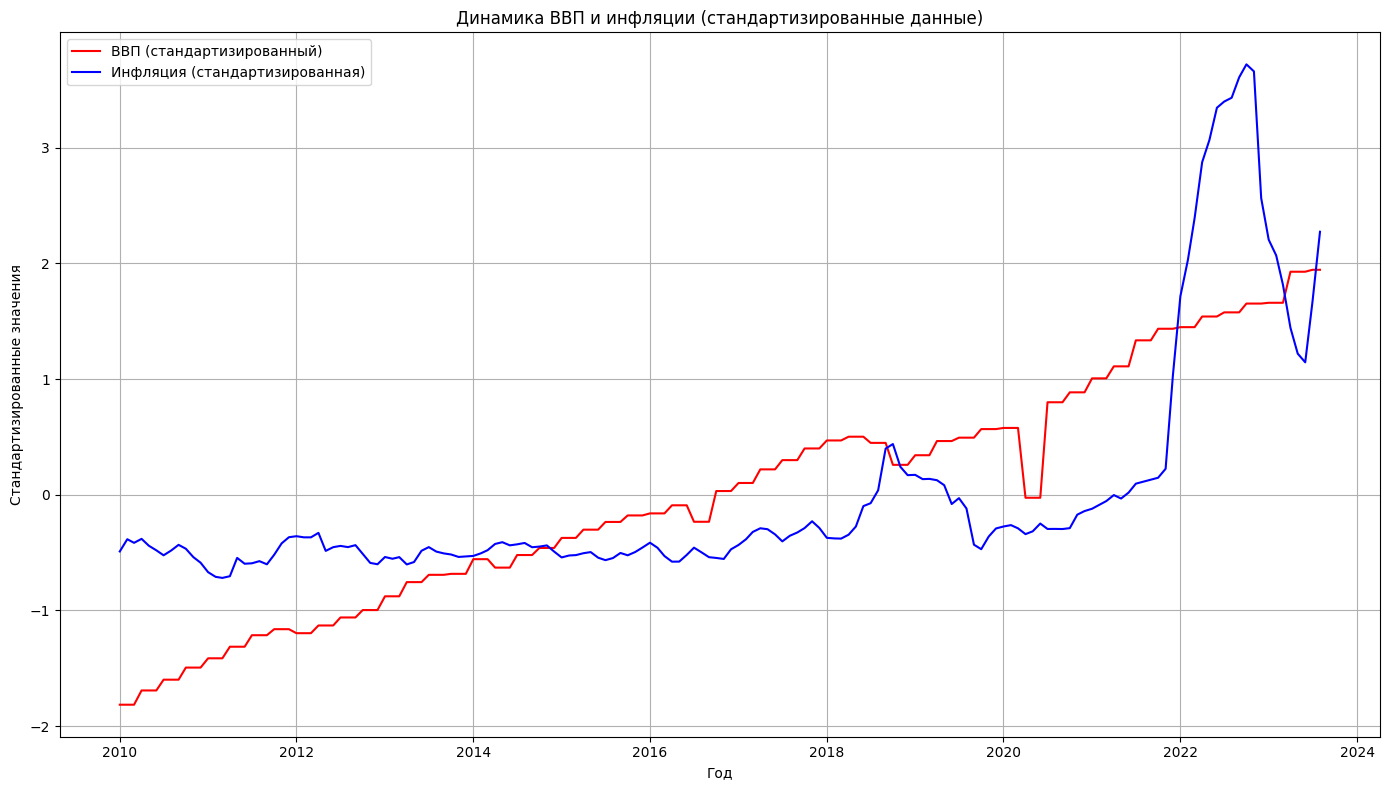

In [ ]:
'''ввп и инфляция станд.'''
plt.figure(figsize=(14, 8))
plt.plot(df_scaled.index, df_scaled['gdp'], label='ВВП (стандартизированный)', color='red')
plt.plot(df_scaled.index, df_scaled['index'], label='Инфляция (стандартизированная)', color='blue')
plt.title('Динамика ВВП и инфляции (стандартизированные данные)')
plt.xlabel('Год')
plt.ylabel('Стандартизированные значения')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

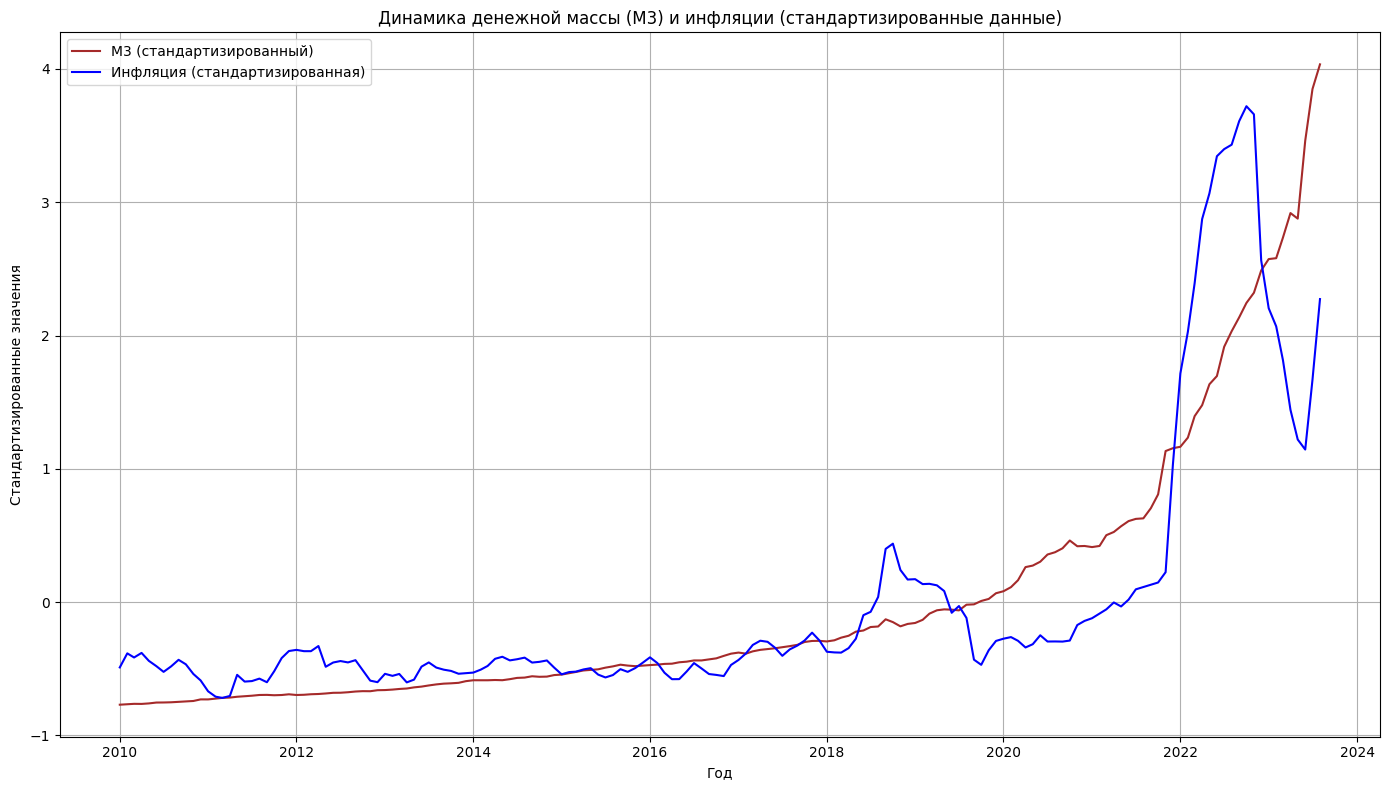

In [ ]:
'''m3 и инффляция'''
plt.figure(figsize=(14, 8))
plt.plot(df_scaled.index, df_scaled['m3'], label='M3 (стандартизированный)', color='brown')
plt.plot(df_scaled.index, df_scaled['index'], label='Инфляция (стандартизированная)', color='blue')
plt.title('Динамика денежной массы (M3) и инфляции (стандартизированные данные)')
plt.xlabel('Год')
plt.ylabel('Стандартизированные значения')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Статистическая значимость переменных

In [ ]:
import statsmodels.api as sm

In [ ]:
#H0: Нет связи между инфляцией и ставкой
#H1: Есть связь между инфляцией и ставкой

y = df['index']
X = df['rate']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.pvalues.rate

## Значение p-value < 0.05 => H1

1.1266822192867656e-05

In [ ]:
#H0: Нет связи между инфляцией и курсом доллара
#H1: Есть связь между инфляцией и курсом доллара

y = df['index']
X = df['usd_try']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.pvalues.usd_try

## Значение p-value < 0.05 => H1

3.142780327384172e-54

In [ ]:
#H0: Нет связи между инфляцией и стоимостью нефти
#H1: Есть связь между инфляцией и стоимостью нефти

y = df['index']
X = df['oil_price']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.pvalues.oil_price

## Значение p-value < 0.05 => H1

0.003076254089321399

In [ ]:
#H0: Нет связи между инфляцией и ввп
#H1: Есть связь между инфляцией и ввп

y = df['index']
X = df['gdp']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.pvalues.gdp

## Значение p-value < 0.05 => H1

7.773067920782881e-25

In [ ]:
#H0: Нет связи между инфляцией и денежной массой
#H1: Есть связь между инфляцией и денежной массой

y = df['index']
X = df['m3']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.pvalues.m3

## Значение p-value < 0.05 => H1

8.038216129927115e-46

In [ ]:
#H0: Нет связи между инфляцией и импортами
#H1: Есть связь между инфляцией и импортами

y = df['index']
X = df['imports1']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.pvalues.imports1

## Значение p-value < 0.05 => H1

1.5916700890895687e-46

In [ ]:
#H0: Нет связи между инфляцией и экспортами
#H1: Есть связь между инфляцией и экспортами

y = df['index']
X = df['exports']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.pvalues.exports

## Значение p-value < 0.05 => H1

8.114399237521255e-39

In [ ]:
df.corr()

,index,rate,usd_try,oil_price,gdp,m3,imports1,exports
index,1.000000,0.335479,0.879907,0.229795,0.693442,0.844645,0.847988,0.806526
rate,0.335479,1.000000,0.431229,-0.207362,0.589994,0.399108,0.167993,0.515531
usd_try,0.879907,0.431229,1.000000,0.028088,0.839923,0.994836,0.828827,0.871305
oil_price,0.229795,-0.207362,0.028088,1.000000,-0.273380,0.014570,0.425123,0.124703
gdp,0.693442,0.589994,0.839923,-0.273380,1.000000,0.835902,0.649006,0.894626
m3,0.844645,0.399108,0.994836,0.014570,0.835902,1.000000,0.823333,0.862726
imports1,0.847988,0.167993,0.828827,0.425123,0.649006,0.823333,1.000000,0.839308
exports,0.806526,0.515531,0.871305,0.124703,0.894626,0.862726,0.839308,1.000000


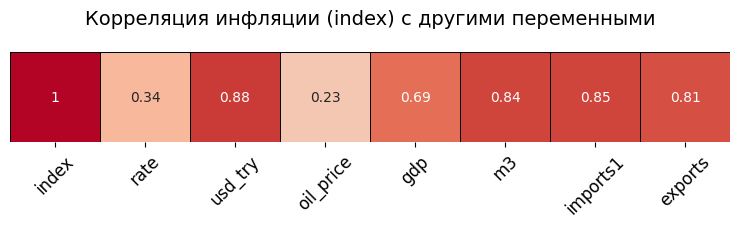

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Вычисляем корреляцию между 'index' и остальными переменными
correlation = df.corr()[['index']].T  # Транспонируем, чтобы получить одну строку

# Создаем тепловую карту для одной строки
plt.figure(figsize=(12, 2))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1,
            cbar=False, linewidths=0.5, linecolor='black', square=True)

# Настройки графика
plt.title('Корреляция инфляции (index) с другими переменными', fontsize=14, pad=20)
plt.xticks(fontsize=12, rotation=45)
plt.yticks([])  # Убираем метки на оси Y, так как у нас одна строка
plt.tight_layout()

# Показать график
plt.show()

In [ ]:
X = df.drop(['index'], axis=1)
y = df['index']

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Вычисляем VIF для каждой переменной
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

    Variable         VIF
0       rate    2.660163
1    usd_try  120.668200
2  oil_price    4.866429
3        gdp   10.601558
4         m3  228.427348
5   imports1   11.245866
6    exports   14.479097


In [ ]:
X = X.drop(['m3'], axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Вычисляем VIF для каждой переменной
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

    Variable         VIF
0       rate   10.835477
1    usd_try    8.900450
2  oil_price   55.535595
3        gdp  278.955087
4   imports1  295.258284
5    exports  286.034066


In [ ]:
X = X.drop(['imports1'], axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Вычисляем VIF для каждой переменной
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

    Variable         VIF
0       rate    7.196366
1    usd_try    6.114335
2  oil_price   18.357965
3        gdp  163.402797
4    exports  285.041709


In [ ]:
X = X.drop(['exports'], axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Вычисляем VIF для каждой переменной
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

    Variable        VIF
0       rate   7.035122
1    usd_try   3.195825
2  oil_price   7.458521
3        gdp  19.480845


In [ ]:
X = X.drop(['gdp'], axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Вычисляем VIF для каждой переменной
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

    Variable       VIF
0       rate  4.044511
1    usd_try  2.521654
2  oil_price  3.095107


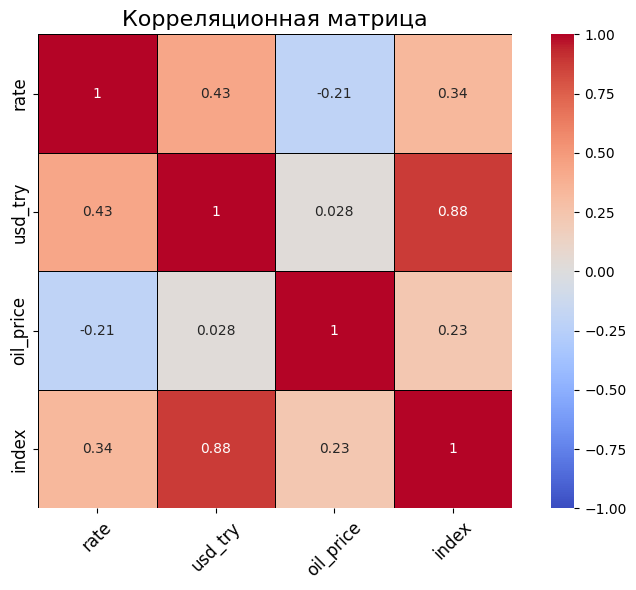

In [ ]:
# Объединяем X и y в один DataFrame
df_combined = pd.concat([X, y], axis=1)

# Вычисляем корреляционную матрицу
correlation = df_combined.corr()

# Строим тепловую карту
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='black', square=True)

# Настройки графика
plt.title('Корреляционная матрица', fontsize=16)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.tight_layout()

# Показать график
plt.show()

# 5. Построение моделей

стандартная регрессия без лагов

In [ ]:
x_copy = X.copy()
y_copy = y.copy()

In [ ]:
X = x_copy.copy()
y = y_copy.copy()
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  index   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     237.0
Date:                Wed, 19 Feb 2025   Prob (F-statistic):           1.22e-58
Time:                        23:16:15   Log-Likelihood:                -571.05
No. Observations:                 164   AIC:                             1150.
Df Residuals:                     160   BIC:                             1163.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.2999      2.675     -4.224      0.0

с добавлением лагов

In [ ]:
import statsmodels.api as sm
import pandas as pd

# Создаем список для хранения результатов
results = []

# Перебираем лаги от 0 до 24
for lag in range(0, 24+1):
    X = x_copy.copy()
    y = y_copy.copy()
    # Создаем лаговую переменную
    X[f'rate_lag_{lag}'] = X['rate'].shift(lag)

    # Удаляем строки с пропущенными значениями
    X_lag = X.dropna()
    y_lag = y.loc[X_lag.index]

    # Выбираем только нужные переменные: лаговая переменная + контрольные
    X_lag = X_lag[['rate_lag_{lag}'.format(lag=lag), 'usd_try', 'oil_price']]
    X_lag = sm.add_constant(X_lag)  # Добавляем константу

    # Строим модель
    model_lag = sm.OLS(y_lag, X_lag).fit()

    # Сохраняем результаты
    results.append({
        'lag': lag,
        'coef_rate': model_lag.params['rate_lag_{lag}'.format(lag=lag)],
        'p_value_rate': model_lag.pvalues['rate_lag_{lag}'.format(lag=lag)],
        'r_squared': model_lag.rsquared
    })

# Преобразуем результаты в DataFrame
results_df = pd.DataFrame(results)
print(results_df)

    lag  coef_rate  p_value_rate  r_squared
0     0   0.004809      0.970906   0.816329
1     1  -0.120595      0.349232   0.821927
2     2  -0.225215      0.060326   0.845731
3     3  -0.277285      0.010239   0.875991
4     4  -0.329407      0.001199   0.891687
5     5  -0.356435      0.000229   0.903787
6     6  -0.379628      0.000060   0.908760
7     7  -0.366307      0.000100   0.909021
8     8  -0.323752      0.000604   0.906639
9     9  -0.249005      0.009391   0.899051
10   10  -0.215771      0.023299   0.889838
11   11  -0.169688      0.070269   0.878793
12   12  -0.126099      0.167056   0.866853
13   13  -0.074154      0.406191   0.850324
14   14  -0.022875      0.791247   0.830925
15   15   0.015151      0.855023   0.805187
16   16   0.051453      0.506916   0.782622
17   17   0.056962      0.408324   0.768905
18   18   0.057888      0.364144   0.737882
19   19   0.039908      0.484203   0.713445
20   20   0.011506      0.820159   0.682524
21   21   0.009063      0.853513

файнал бро

In [ ]:
lag = 6
X = x_copy.copy()
y = y_copy.copy()
# Создаем лаговую переменную
X[f'rate_lag_{lag}'] = X['rate'].shift(lag)

# Удаляем строки с пропущенными значениями
X_lag = X.dropna()
y_lag = y.loc[X_lag.index]

# Выбираем только нужные переменные: лаговая переменная + контрольные
X_lag = X_lag[['rate_lag_{lag}'.format(lag=lag), 'usd_try', 'oil_price']]
X_lag = sm.add_constant(X_lag)  # Добавляем константу

# Строим модель
model_lag = sm.OLS(y_lag, X_lag).fit()
print(model_lag.summary())

                            OLS Regression Results                            
Dep. Variable:                  index   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     511.3
Date:                Wed, 19 Feb 2025   Prob (F-statistic):           8.15e-80
Time:                        23:26:14   Log-Likelihood:                -489.35
No. Observations:                 158   AIC:                             986.7
Df Residuals:                     154   BIC:                             998.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.5101      1.948     -4.882      0.0

# 6. Выводы

какой лаг/какое время/рекомендации по ставке цб

**Основные результаты модели:**


---


**Качество модели:**

R-квадрат (R-squared): 0.909.

Модель объясняет 90.9% вариации инфляции (index). Это очень высокий показатель, что говорит о хорошем качестве модели.

Скорректированный R-квадрат (Adj. R-squared): 0.907.

Почти не отличается от R-квадрата, что указывает на отсутствие переобучения.


---


**Статистическая значимость модели:**

F-статистика: 511.3, p-value: 8.15e-80.

Модель в целом статистически значима (p-value < 0.05).


---



**Коэффициенты и их значимость:**

const (константа):

Коэффициент: -9.5101, p-value: 0.000.

Константа статистически значима (p-value < 0.05).

rate_lag_6 (учетная ставка с лагом 6 месяцев):

Коэффициент: -0.3796, p-value: 0.000.

Учетная ставка с лагом 6 месяцев значимо влияет на инфляцию (p-value < 0.05).

Увеличение учетной ставки на 1 единицу приводит к снижению инфляции на 0.3796 единицы через 6 месяцев.

usd_try (курс USD/TRY):

Коэффициент: 3.9000, p-value: 0.000.

Курс доллара значимо влияет на инфляцию (p-value < 0.05).

Увеличение курса USD/TRY на 1 единицу приводит к увеличению инфляции на 3.9000 единицы.

oil_price (стоимость нефти):

Коэффициент: 0.1463, p-value: 0.000.

Стоимость нефти значимо влияет на инфляцию (p-value < 0.05).

Увеличение цены на нефть на 1 единицу приводит к увеличению инфляции на 0.1463 единицы.


---



**Дополнительные тесты:**

Durbin-Watson: 0.197.

Значение близко к 0 указывает на наличие автокорреляции в остатках модели. Это может быть проблемой, и её нужно учитывать.

Omnibus и Jarque-Bera:

Оба теста показывают, что остатки модели распределены нормально (p-value > 0.05).

**Интерпретация результатов:**

---


**Учетная ставка (rate_lag_6):**

Учетная ставка влияет на инфляцию с задержкой в 6 месяцев.

Повышение учетной ставки сегодня приведет к снижению инфляции через 6 месяцев.

---
**Курс USD/TRY (usd_try):**

Курс доллара оказывает сильное влияние на инфляцию.

Укрепление доллара (рост курса USD/TRY) приводит к росту инфляции.

---
**Стоимость нефти (oil_price):**

Цены на нефть также значимо влияют на инфляцию.

Рост цен на нефть приводит к увеличению инфляции.


**Рекомендации для ЦБ:**

---

**Учетная ставка:**

Учетная ставка — эффективный инструмент для управления инфляцией, но её влияние проявляется с задержкой в 6 месяцев.

ЦБ может использовать повышение ставки для снижения инфляции в среднесрочной перспективе.

---

**Курс USD/TRY:**

Поскольку курс доллара сильно влияет на инфляцию, ЦБ может рассмотреть меры по стабилизации валютного курса (например, интервенции на валютном рынке).

---

**Цены на нефть:**

Учитывая влияние цен на нефть, можно рассмотреть меры по диверсификации энергетических источников или снижению зависимости от импорта нефти.

---

**Мониторинг инфляции:**

Учитывайте задержку в 6 месяцев при принятии решений. Например, если инфляция растет сегодня, повышение ставки сейчас поможет снизить её через полгода.